# Dataset Description

## Global Data on Sustainable Energy 2000-2020

**Data source:** https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy

### About Dataset

This dataset contains worldwide country-level data on sustainable energy indicators and other important factors from 2000 to 2020. It includes information on electricity access, clean energy use, energy production and consumption, financial flows, carbon emissions, and key economic and geographic metrics.

### Key Features

- entity - The name of the country or region for which the data is reported

- year - The year for which the data is reported, ranging from 2000 to 2020

- electricity_access (Access to electricity (% of population)) - The percentage of population with access to electricity

- clean_cooking (Access to clean fuels for cooking (% of population)) - The percentage of the population with primary reliance on clean fuels

- renew_elcap_per_capita (Renewable-electricity-generating-capacity-per-capita) - Installed Renewable energy capacity per person

- financial_flows (Financial flows to developing countries (US $)) -  Aid and assistance from developed countries for clean energy projects

- renewables_share (Renewable energy share in total final energy consumption (%)) - Percentage of renewable energy in final energy consumption

- fossil_electricity (Electricity from fossil fuels (TWh)) - Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours

- nuclear_electricity (Electricity from nuclear (TWh)) - Electricity generated from nuclear power in terawatt-hours

- renewable_electricity (Electricity from renewables (TWh)) Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours

- low_carbon_electricity (Low-carbon electricity (% electricity)) - Percentage of electricity from low-carbon sources (nuclear and renewables)

- energy_pc (Primary energy consumption per capita (kWh/person)) Energy consumption per person in kilowatt-hours

- energy_intensity (Energy intensity level of primary energy (MJ/$2011 PPP GDP)) - Energy use per unit of GDP at purchasing power parity

- co2_emissions (Value_co2_emissions (metric tons per capita)) Carbon dioxide emissions per person in metric tons

- renewables_equiv (Renewables (% equivalent primary energy)) - Equivalent primary energy that is derived from renewable sources

- gdp_growth (GDP growth (annual %)) - Annual GDP growth rate based on constant local currency

- gdp_pc (GDP per capita) - Gross domestic product per person

- density (Density (P/Km2)) Population density in persons per square kilometer

- land_area (Land Area (Km2)) - Total land area in square kilometers

- latitude - Latitude of the country's centroid in decimal degrees

- longitude - Longitude of the country's centroid in decimal degrees

## 1 Import Libraries and Dataset Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import re
import plotly.express as px


In [2]:
df = pd.read_csv("global_data_on_sustainable_energy.csv")

## 2 Initial Exploration

In [3]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [4]:
df.shape

(3649, 21)

In [5]:
df.index

RangeIndex(start=0, stop=3649, step=1)

#### Column name formatting

1. clean_column_names() for automatic formatting of column names by removing special characters and standardizing them for easier use.

In [6]:
def clean_column_names(columns):
    cleaned = []
    for col in columns:
        col = str(col)                             # Ensure column name is a string
        col = col.replace("\n", " ")               # Remove line breaks
        col = re.sub(r"[^0-9a-zA-Z]+", "_", col)   # Replace special characters with underscores
        col = col.strip("_")                       # Remove leading/trailing underscores
        col = col.lower()                          # Convert to lowercase
        cleaned.append(col)
    return cleaned

df.columns = clean_column_names(df.columns)

2. rename_map for manual renaming of selected columns to improve clarity and consistency.

In [7]:
rename_map = {
    "access_to_electricity_of_population": "electricity_access",
    "access_to_clean_fuels_for_cooking": "clean_cooking",
    "renewable_electricity_generating_capacity_per_capita": "renew_elcap_per_capita",
    "financial_flows_to_developing_countries_us": "financial_flows",
    "renewable_energy_share_in_the_total_final_energy_consumption": "renewables_share",
    "electricity_from_fossil_fuels_twh": "fossil_electricity",
    "electricity_from_nuclear_twh": "nuclear_electricity",
    "electricity_from_renewables_twh": "renewable_electricity",
    "low_carbon_electricity_electricity": "low_carbon_electricity",
    "primary_energy_consumption_per_capita_kwh_person": "energy_pc",
    "energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp": "energy_intensity",
    "value_co2_emissions_kt_by_country": "co2_emissions",
    "renewables_equivalent_primary_energy": "renewables_equiv",
    "gdp_growth": "gdp_growth",
    "gdp_per_capita": "gdp_pc",
    "density_n_p_km2": "density",
    "land_area_km2": "land_area"
}

df.rename(columns=rename_map, inplace=True)

In [8]:
df.columns.tolist()

['entity',
 'year',
 'electricity_access',
 'clean_cooking',
 'renew_elcap_per_capita',
 'financial_flows',
 'renewables_share',
 'fossil_electricity',
 'nuclear_electricity',
 'renewable_electricity',
 'low_carbon_electricity',
 'energy_pc',
 'energy_intensity',
 'co2_emissions',
 'renewables_equiv',
 'gdp_growth',
 'gdp_pc',
 'density',
 'land_area',
 'latitude',
 'longitude']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entity                  3649 non-null   object 
 1   year                    3649 non-null   int64  
 2   electricity_access      3639 non-null   float64
 3   clean_cooking           3480 non-null   float64
 4   renew_elcap_per_capita  2718 non-null   float64
 5   financial_flows         1560 non-null   float64
 6   renewables_share        3455 non-null   float64
 7   fossil_electricity      3628 non-null   float64
 8   nuclear_electricity     3523 non-null   float64
 9   renewable_electricity   3628 non-null   float64
 10  low_carbon_electricity  3607 non-null   float64
 11  energy_pc               3649 non-null   float64
 12  energy_intensity        3442 non-null   float64
 13  co2_emissions           3221 non-null   float64
 14  renewables_equiv        1512 non-null   

## 3 Data Types

In [10]:
df.dtypes

entity                     object
year                        int64
electricity_access        float64
clean_cooking             float64
renew_elcap_per_capita    float64
financial_flows           float64
renewables_share          float64
fossil_electricity        float64
nuclear_electricity       float64
renewable_electricity     float64
low_carbon_electricity    float64
energy_pc                 float64
energy_intensity          float64
co2_emissions             float64
renewables_equiv          float64
gdp_growth                float64
gdp_pc                    float64
density                    object
land_area                 float64
latitude                  float64
longitude                 float64
dtype: object

In [11]:
df.dtypes.value_counts()

float64    18
object      2
int64       1
Name: count, dtype: int64

In [12]:
string_columns = df.select_dtypes(include='object').columns.tolist()
numeric_columns = df.select_dtypes(include='number').columns.tolist()

In [13]:
df.loc[:, numeric_columns].head()

,year,electricity_access,clean_cooking,renew_elcap_per_capita,financial_flows,renewables_share,fossil_electricity,nuclear_electricity,renewable_electricity,low_carbon_electricity,energy_pc,energy_intensity,co2_emissions,renewables_equiv,gdp_growth,gdp_pc,land_area,latitude,longitude
0,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,652230.0,33.93911,67.709953
1,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,652230.0,33.93911,67.709953
2,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,652230.0,33.93911,67.709953
3,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,652230.0,33.93911,67.709953
4,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,652230.0,33.93911,67.709953


In [14]:
df.loc[:, string_columns].head()

,entity,density
0,Afghanistan,60
1,Afghanistan,60
2,Afghanistan,60
3,Afghanistan,60
4,Afghanistan,60


Displaying object-type values from the density column

In [15]:
df["density"].unique()

array(['60', '105', '18', '26', '223', '17', '104', '590', '3', '109',
       '123', '41', '2,239', '1,265', '668', '47', '383', '108', '1281',
       '20', '64', '4', '25', '76', '463', '95', '56', '274', '8', '13',
       '153', '46', '467', '100', '73', '106', '131', '136', '137', '43',
       '96', '225', '71', '103', '313', '50', '35', '31', '67', '115',
       '49', '119', nan, '9', '239', '57', '240', '81', '331', '167',
       '53', '70', '414', '89', '107', '464', '151', '93', '400', '206',
       '273', '347', '7', '94', '147', '34', '30', '667', '242', '48',
       '203', '99', '1,802', '1,380', '5', '626', '66', '2', '83', '40',
       '541', '508', '16', '55', '19', '226', '15', '287', '58', '368',
       '124', '111', '248', '84', '525', '205', '301', '284', '87', '214',
       '8,358', '114', '341', '219', '68', '152', '110', '393', '229',
       '75', '118', '281', '36', '79', '38'], dtype=object)

Converting numeric strings into float data type

In [16]:
df["density"] = pd.to_numeric(df["density"], errors= "coerce")

In [17]:
df["density"].dtype

dtype('float64')

In [18]:
string_columns = df.select_dtypes(include='object').columns.tolist()
numeric_columns = df.select_dtypes(include='number').columns.tolist()

## 4 NaN Analysis

Identification of columns containing NaN values.

In [19]:
df.isnull()

,entity,year,electricity_access,clean_cooking,renew_elcap_per_capita,financial_flows,renewables_share,fossil_electricity,nuclear_electricity,renewable_electricity,...,energy_pc,energy_intensity,co2_emissions,renewables_equiv,gdp_growth,gdp_pc,density,land_area,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


Total number of NaN values in the dataset.

In [20]:
df.isnull().sum().sum()


np.int64(7083)

Count of missing (NaN) values per column.

In [21]:
df.isnull().sum().sort_values(ascending=False)

renewables_equiv          2137
financial_flows           2089
renew_elcap_per_capita     931
co2_emissions              428
gdp_growth                 317
gdp_pc                     282
energy_intensity           207
renewables_share           194
clean_cooking              169
nuclear_electricity        126
density                    106
low_carbon_electricity      42
renewable_electricity       21
fossil_electricity          21
electricity_access          10
latitude                     1
land_area                    1
longitude                    1
energy_pc                    0
year                         0
entity                       0
dtype: int64

Proportion of missing (NaN) values per column.

In [22]:
NaN_percentage = df.isnull().mean() *100
NaN_percentage[NaN_percentage > 0].sort_values(ascending=False)

renewables_equiv          58.563990
financial_flows           57.248561
renew_elcap_per_capita    25.513839
co2_emissions             11.729241
gdp_growth                 8.687312
gdp_pc                     7.728145
energy_intensity           5.672787
renewables_share           5.316525
clean_cooking              4.631406
nuclear_electricity        3.453001
density                    2.904905
low_carbon_electricity     1.151000
fossil_electricity         0.575500
renewable_electricity      0.575500
electricity_access         0.274048
land_area                  0.027405
latitude                   0.027405
longitude                  0.027405
dtype: float64

Visualization of missing (NaN) values.

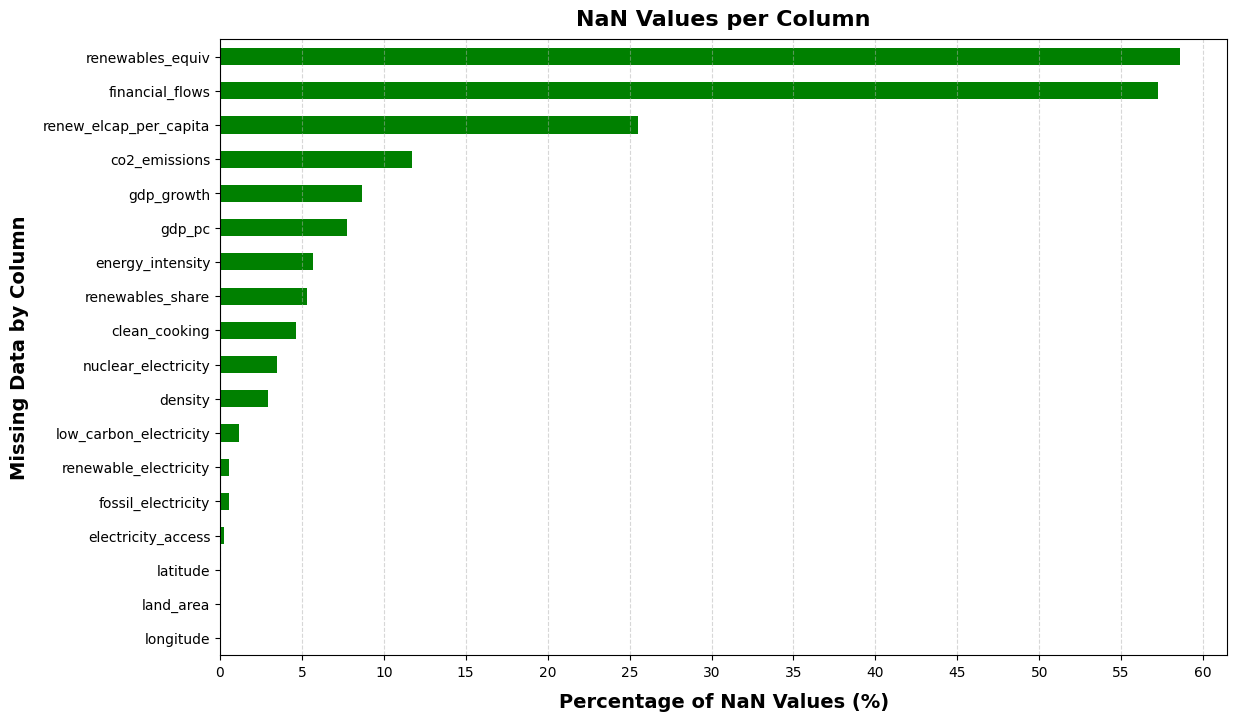

In [23]:
bplot = NaN_percentage[NaN_percentage > 0].sort_values().plot.barh(figsize=(13,8), color="green")
bplot.xaxis.set_major_locator(MultipleLocator(5))
bplot.set_title("NaN Values per Column", fontweight="600", fontsize=16, pad= 10 )
bplot.set_xlabel("Percentage of NaN Values (%)", fontweight="600", fontsize=14, labelpad= 10)
bplot.set_ylabel("Missing Data by Column", fontweight="600", fontsize=14, labelpad= 10)
bplot.grid(axis='x', linestyle='--', alpha=0.5)



## 5 General Analysis

Descriptive statistics for numerical columns.

In [24]:
df.loc[:, numeric_columns].describe()

,year,electricity_access,clean_cooking,renew_elcap_per_capita,financial_flows,renewables_share,fossil_electricity,nuclear_electricity,renewable_electricity,low_carbon_electricity,energy_pc,energy_intensity,co2_emissions,renewables_equiv,gdp_growth,gdp_pc,density,land_area,latitude,longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3543.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,141.030483,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,169.221081,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,30.000000,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,83.000000,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,203.000000,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,1281.000000,9.984670e+06,64.963051,178.065032


Descriptive statistics for string columns.

In [25]:
df.loc[:, string_columns].describe()

,entity
count,3649
unique,176
top,Afghanistan
freq,21


Detection of duplicate records.

In [26]:
df.duplicated().sum()

np.int64(0)

## 6 Target column analysis



I have selected "nuclear_electricity" as the target column for the analysis, representing the production of electricity from nuclear power in terrawat-hours over the period 2000–2020.

In [27]:
df["nuclear_electricity"].value_counts()

nuclear_electricity
0.00      2945
5.55         3
11.62        3
3.91         3
43.52        2
          ... 
436.76       1
421.08       1
415.16       1
23.29        1
789.88       1
Name: count, Length: 547, dtype: int64

In [28]:
df.nuclear_electricity.isna().sum()

np.int64(126)

Determining the total number of countries

In [29]:
df["entity"].nunique()

176

Note: The column "nuclear_electricity" contains 2,945 zero values, corresponding to countries that do not produce electricity from nuclear energy and 126 NaN values.

For a clearer visualization of the global overview of nuclear energy production, a map displaying individual countries is plotted.


### Dynamic map of nuclear electricity production in 2000 - 2020 

In [30]:
cols = ["entity", "year", "nuclear_electricity"]

# selection of necessary columns
df_map = df[cols].copy()

#log - scale transformaation for enhancing the color differentiation
df_map["nuclear_electricity_log"] = df_map["nuclear_electricity"].apply(
    lambda x: np.log10(x) if pd.notna(x) and x > 0 else (0 if x == 0 else np.nan)
)

# formatted text for hover - interactive tooltip
df_map["description"] = df_map.apply(
    lambda row: (
        f"{row['entity']} produced {row['nuclear_electricity']:,.2f} TWh "
        f"from nuclear energy in {int(row['year'])}"
        if pd.notna(row['nuclear_electricity']) else
        f"No data for {row['entity']} in {int(row['year'])}"
    ),
    axis=1
)

# specification of the map
fig = px.choropleth(
    df_map,
    locations="entity",
    locationmode="country names",
    color="nuclear_electricity_log",  
    hover_name="entity",
    hover_data={"description": True}, 
    animation_frame="year",
    color_continuous_scale="BuGn",
    range_color=(df_map["nuclear_electricity_log"].min(skipna=True),
                 df_map["nuclear_electricity_log"].max(skipna=True)),
    title="Nuclear Electricity Production 2000 – 2020 (TWh)"
)

# layout adjustment and country borders
fig.update_layout(
    title_x=0.5,
    title_font_size=22,
    width=900,
    height=500,
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title="TWh in log₁₀ scale"),
    geo=dict(bgcolor="#ffffff")  # grey background fot NaN values
)

# setting country borders 
fig.update_geos(
    showframe=True,
    showcoastlines=True,
    coastlinecolor="black",
    showcountries=True,
    countrycolor="black",
    projection_type="natural earth"
)

# removing the start/ stop button
fig.layout.updatemenus = []

fig.show()

Creating a new DataFrame with filtered zero values. 

In [31]:
df_nucl = df.loc[df["nuclear_electricity"] > 0]

Determining the number of countries producing nuclear electricity

In [32]:
df_nucl["entity"].nunique()

30

Global percentage of countries producing nuclear energy

In [33]:
(df_nucl["entity"].nunique() / df["entity"].nunique()) * 100

17.045454545454543

Total nuclear electricity in TWh produced between 2000 and 2020 for individual countries.

In [34]:
df_nucl.groupby("entity")["nuclear_electricity"].sum().sort_values(ascending=False)

entity
United States           16602.61
France                   8914.20
Japan                    3386.87
China                    2609.19
Germany                  2602.75
Canada                   1844.24
Ukraine                  1783.11
United Kingdom           1493.76
Sweden                   1347.55
Spain                    1240.44
Belgium                   903.03
India                     577.53
Czechia                   547.16
Switzerland               516.54
Finland                   484.14
Bulgaria                  349.27
Slovakia                  335.53
Hungary                   311.72
Brazil                    277.06
South Africa              265.55
Mexico                    205.71
Romania                   195.46
Argentina                 141.18
Slovenia                  120.05
Lithuania                 114.06
Pakistan                   86.08
Netherlands                81.70
Armenia                    46.63
United Arab Emirates        1.56
Belarus                     0.34
Nam

Average nuclear electricity production values in TWh for individual countries in 2000 - 2020.

In [35]:
df_nucl.groupby("entity")["nuclear_electricity"].mean().sort_values(ascending=False)

entity
United States           790.600476
France                  424.485714
Japan                   169.343500
China                   124.247143
Germany                 123.940476
Canada                   87.820952
Ukraine                  84.910000
United Kingdom           71.131429
Sweden                   64.169048
Spain                    59.068571
Belgium                  43.001429
India                    27.501429
Czechia                  26.055238
Switzerland              24.597143
Finland                  23.054286
Bulgaria                 16.631905
Slovakia                 15.977619
Hungary                  14.843810
Brazil                   13.193333
South Africa             12.645238
Lithuania                11.406000
Mexico                    9.795714
Romania                   9.307619
Argentina                 6.722857
Slovenia                  5.716667
Pakistan                  4.099048
Netherlands               3.890476
Armenia                   2.220476
United Arab E

Calculation of the average nuclear electricity production for each country from 2000 to 2020, accompanied by the following table view.

In [36]:
df_nucl.groupby(["entity", "year"])["nuclear_electricity"].mean()

entity         year
Argentina      2000      5.99
               2001      6.54
               2002      5.39
               2003      7.03
               2004      7.31
                        ...  
United States  2016    805.69
               2017    804.95
               2018    807.08
               2019    809.41
               2020    789.88
Name: nuclear_electricity, Length: 578, dtype: float64

In [37]:

df_nucl.groupby(["entity", "year"])["nuclear_electricity"].mean().unstack().style.background_gradient(cmap="berlin", axis= None)

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
entity,,,,,,,,,,,,,,,,,,,,,
Argentina,5.990000,6.540000,5.390000,7.030000,7.310000,6.370000,7.150000,6.720000,6.850000,7.590000,6.690000,5.890000,5.900000,5.730000,5.260000,6.640000,7.820000,5.770000,6.510000,7.970000,10.060000
Armenia,1.840000,1.990000,2.090000,1.820000,2.200000,2.500000,2.420000,2.350000,2.270000,2.290000,2.290000,2.360000,2.120000,2.170000,2.270000,2.570000,2.190000,2.410000,1.900000,2.030000,2.550000
Belarus,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.340000
Belgium,48.160000,46.350000,47.360000,47.380000,47.310000,47.600000,46.650000,48.230000,45.570000,47.220000,47.940000,48.230000,40.290000,42.640000,33.700000,26.100000,43.520000,42.230000,28.600000,43.520000,34.430000
Brazil,4.940000,14.270000,13.840000,13.400000,11.600000,9.200000,12.980000,11.650000,13.210000,12.220000,13.770000,14.800000,15.170000,14.650000,14.460000,13.910000,14.970000,14.860000,14.790000,15.160000,13.210000
Bulgaria,18.180000,19.550000,20.220000,17.280000,16.820000,18.650000,19.490000,14.640000,15.770000,15.260000,15.250000,16.310000,15.780000,14.170000,15.870000,15.380000,15.780000,15.550000,16.130000,16.560000,16.630000
Canada,69.160000,72.860000,71.750000,71.150000,85.870000,86.830000,92.440000,88.190000,88.300000,85.130000,85.530000,88.290000,89.490000,97.580000,101.210000,96.050000,95.690000,95.570000,95.030000,95.470000,92.650000
China,16.740000,17.470000,25.130000,43.340000,50.470000,53.090000,54.840000,62.130000,68.390000,70.050000,74.740000,87.200000,98.320000,111.500000,133.220000,171.380000,213.180000,248.100000,295.000000,348.700000,366.200000
Czechia,13.590000,14.750000,18.740000,25.870000,26.330000,24.730000,26.050000,26.170000,26.550000,27.210000,28.000000,28.280000,30.320000,30.750000,30.330000,26.840000,24.100000,28.340000,29.920000,30.250000,30.040000


The grouped bar chart comparing nuclear electricity production for the top 10 producing countries between 2000 and 2020 (years: 2000, 2005, 2010, 2015, 2020), with bars grouped by country and color-coded by year.

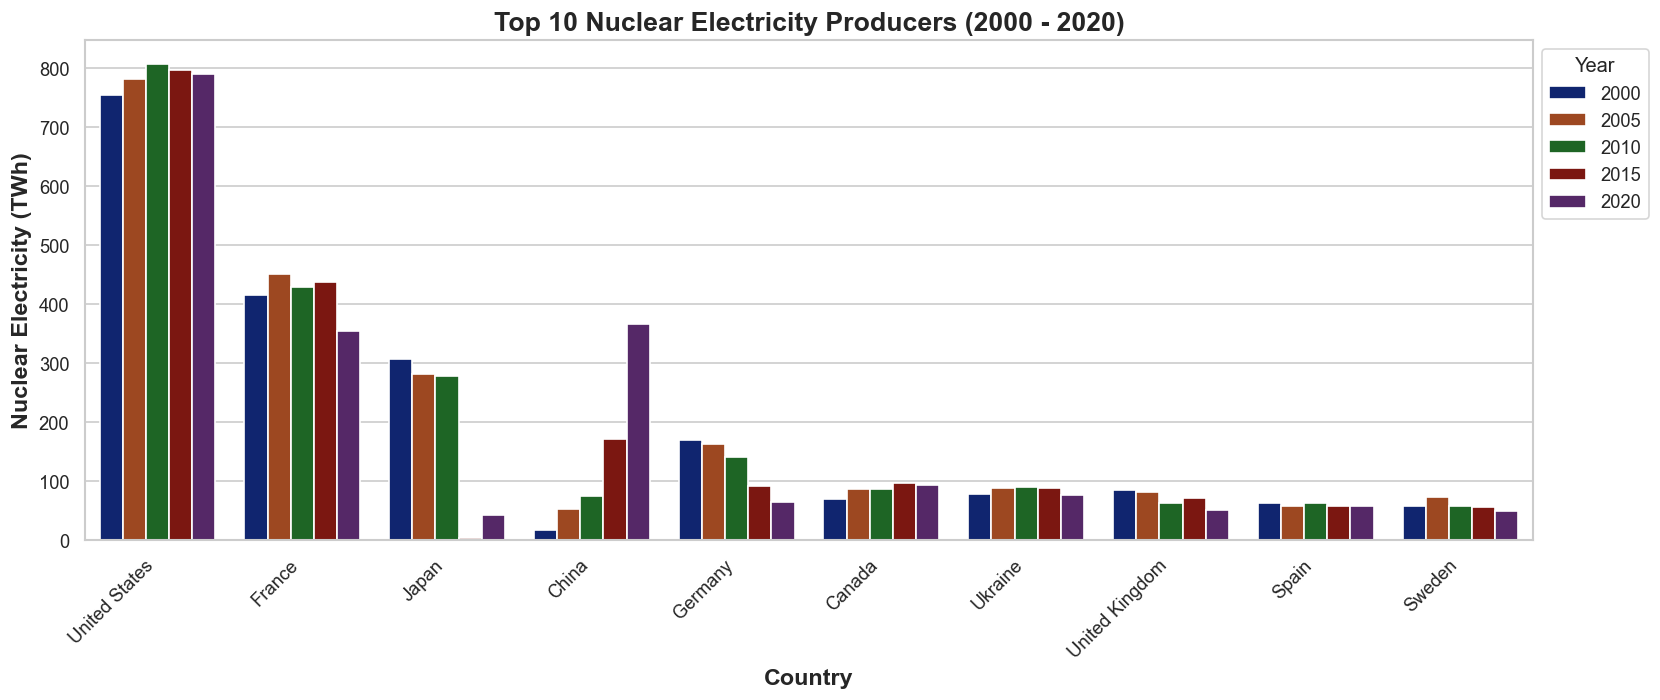

In [38]:
# getting the top 10 countries by average production
top10_countries = (
    df_nucl.groupby("entity")["nuclear_electricity"]
    .mean()
    .nlargest(10)
    .index
)

# filterring data 
df_plot = df_nucl[df_nucl["entity"].isin(top10_countries)].copy()

# years to display
years = [2000, 2005, 2010, 2015, 2020]
df_plot = df_plot[df_plot["year"].isin(years)]
df_plot["year"] = df_plot["year"].astype(str)

# setting order based on average production
order = (
    df_plot.groupby("entity")["nuclear_electricity"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# drowing the chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6), dpi=120)

ax = sns.barplot(
    data=df_plot,
    x="entity",
    y="nuclear_electricity",
    hue="year",
    order=order,
    palette="dark",
    errorbar=None
)

plt.title("Top 10 Nuclear Electricity Producers (2000 - 2020)", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontweight="bold")
plt.ylabel("Nuclear Electricity (TWh)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")

ax.legend(title="Year", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

This boxplot shows the distribution of nuclear electricity production (in TWh) for the world’s top 10 producing countries from 2000 to 2020.

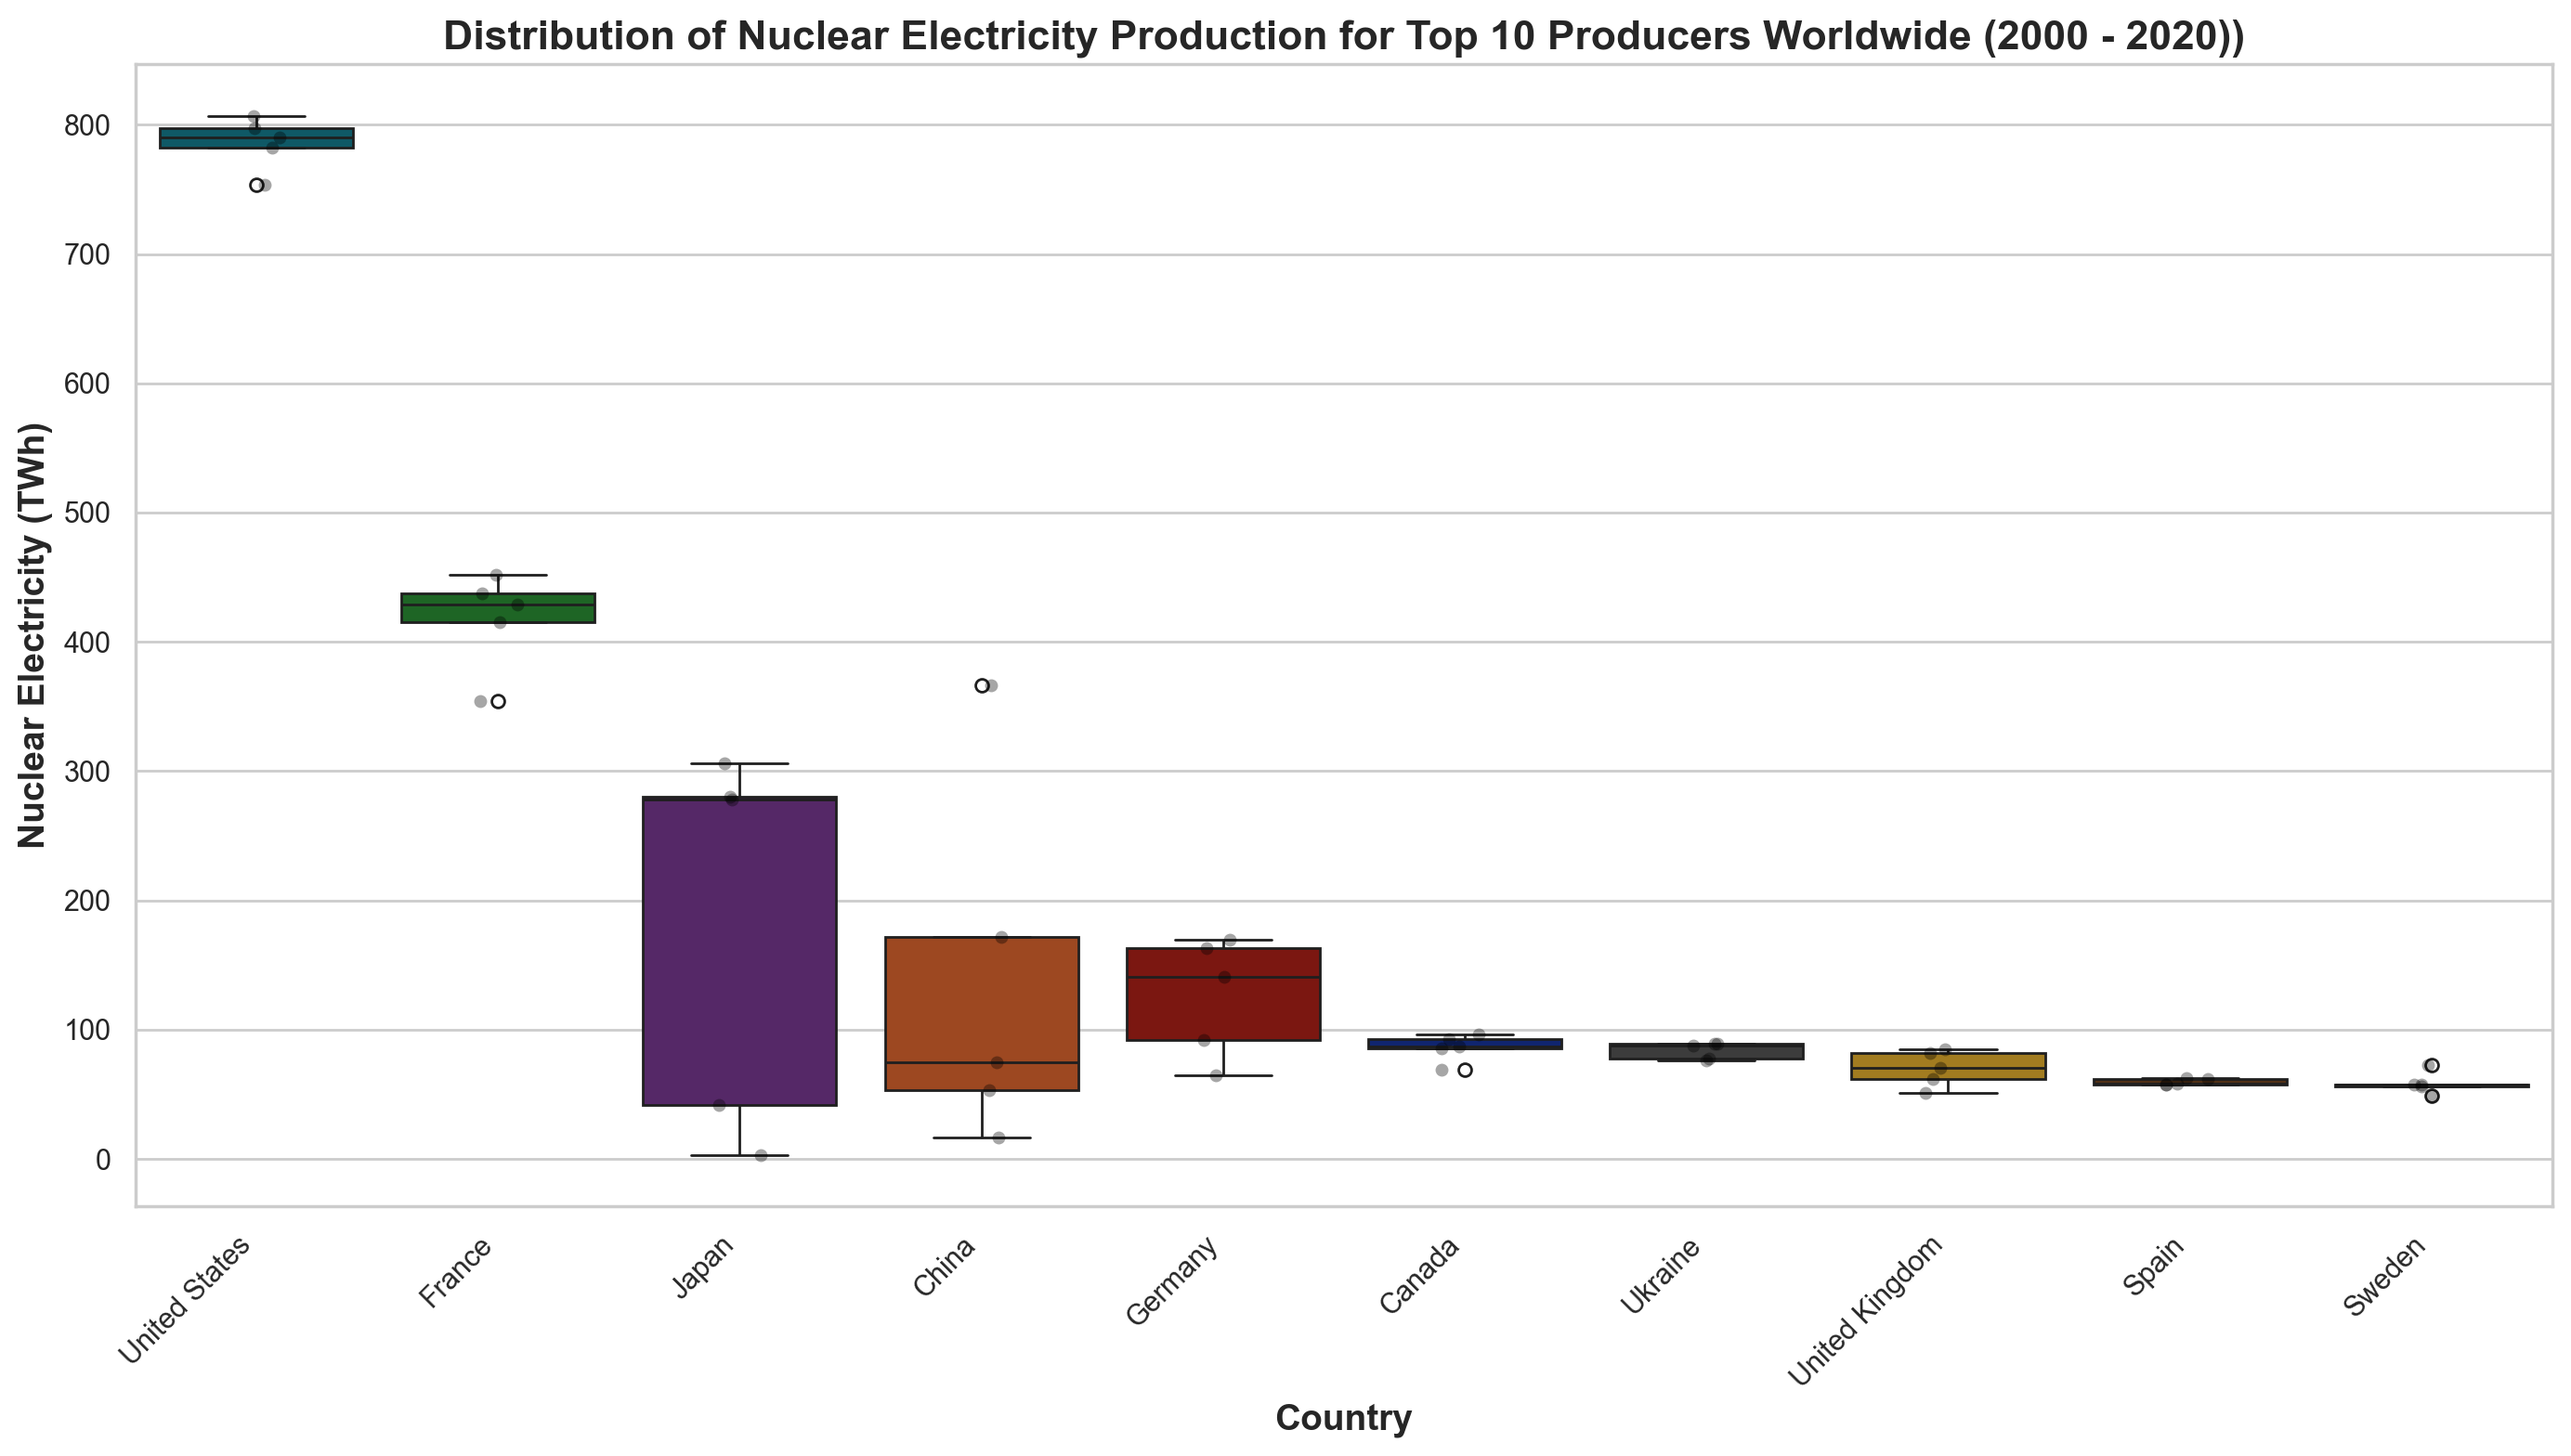

In [39]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8), dpi=200)

# boxplot 
ax = sns.boxplot(
    data=df_plot,
    x="entity",
    y="nuclear_electricity",
    order=order,
    hue="entity",            # tie colors to entity
    palette="dark",
    dodge=False,             # one box per entity
    fliersize=5,             # outlier markers           
)

# jittered points to show yearly distribution
sns.stripplot(
    data=df_plot,
    x="entity",
    y="nuclear_electricity",
    order=order,
    color="black",
    size=5,
    alpha=0.35
)

# labels and styling
ax.set_title("Distribution of Nuclear Electricity Production for Top 10 Producers Worldwide (2000 - 2020))",
             fontsize=16, fontweight="bold")
ax.set_xlabel("Country", fontsize=14, fontweight="bold")
ax.set_ylabel("Nuclear Electricity (TWh)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Correlation Analysis

In [40]:
num_cols = df_nucl.loc[:, numeric_columns]
num_cols.corr(method="pearson")["nuclear_electricity"].sort_values(ascending=False)

nuclear_electricity       1.000000
fossil_electricity        0.593282
co2_emissions             0.530242
land_area                 0.434698
energy_pc                 0.404982
renewable_electricity     0.401304
gdp_pc                    0.336507
renew_elcap_per_capita    0.236842
clean_cooking             0.167503
electricity_access        0.150197
latitude                  0.097515
financial_flows           0.093142
energy_intensity          0.025344
low_carbon_electricity   -0.001956
year                     -0.004209
gdp_growth               -0.073747
density                  -0.115456
renewables_equiv         -0.118626
renewables_share         -0.217361
longitude                -0.251804
Name: nuclear_electricity, dtype: float64

In [41]:
num_cols.corr(method="spearman")["nuclear_electricity"].sort_values(ascending=False)


nuclear_electricity       1.000000
energy_pc                 0.538221
renewable_electricity     0.534320
co2_emissions             0.523919
gdp_pc                    0.436549
electricity_access        0.424619
fossil_electricity        0.416018
clean_cooking             0.380179
financial_flows           0.372410
land_area                 0.352183
latitude                  0.315242
low_carbon_electricity    0.163790
energy_intensity          0.131604
year                      0.028935
density                   0.013423
renewables_equiv          0.007975
renew_elcap_per_capita   -0.110834
gdp_growth               -0.144246
longitude                -0.162170
renewables_share         -0.171376
Name: nuclear_electricity, dtype: float64

The Spearman Correlaion Heatmap dislpaying relationships between numeric variables in the filtered dataset.

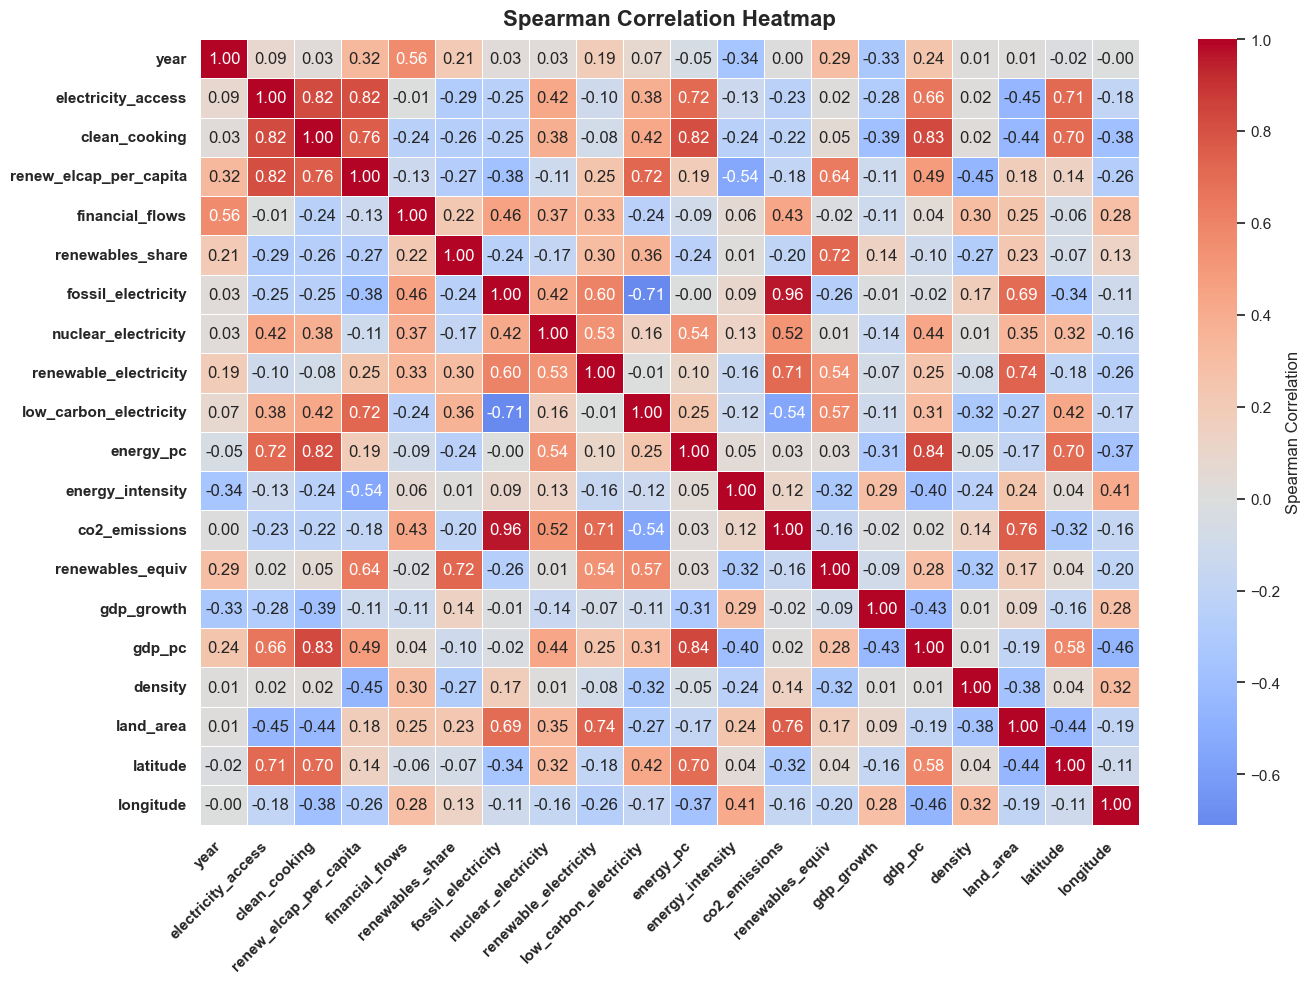

In [42]:
corr_heatmap = num_cols.corr(method="spearman")

plt.figure(figsize=(14,10))
sns.heatmap(
    corr_heatmap,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Spearman Correlation"}
)
plt.xticks(rotation=45, ha="right", fontweight="bold")
plt.yticks(fontweight="bold")
plt.title("Spearman Correlation Heatmap", fontsize=16, fontweight="bold", pad=10)
plt.tight_layout()
plt.show()

The scatterplots visualization of the pairwise relationships between nuclear electricity production and selected variables, helping to identify possible trends or patterns observed in the heatmap.

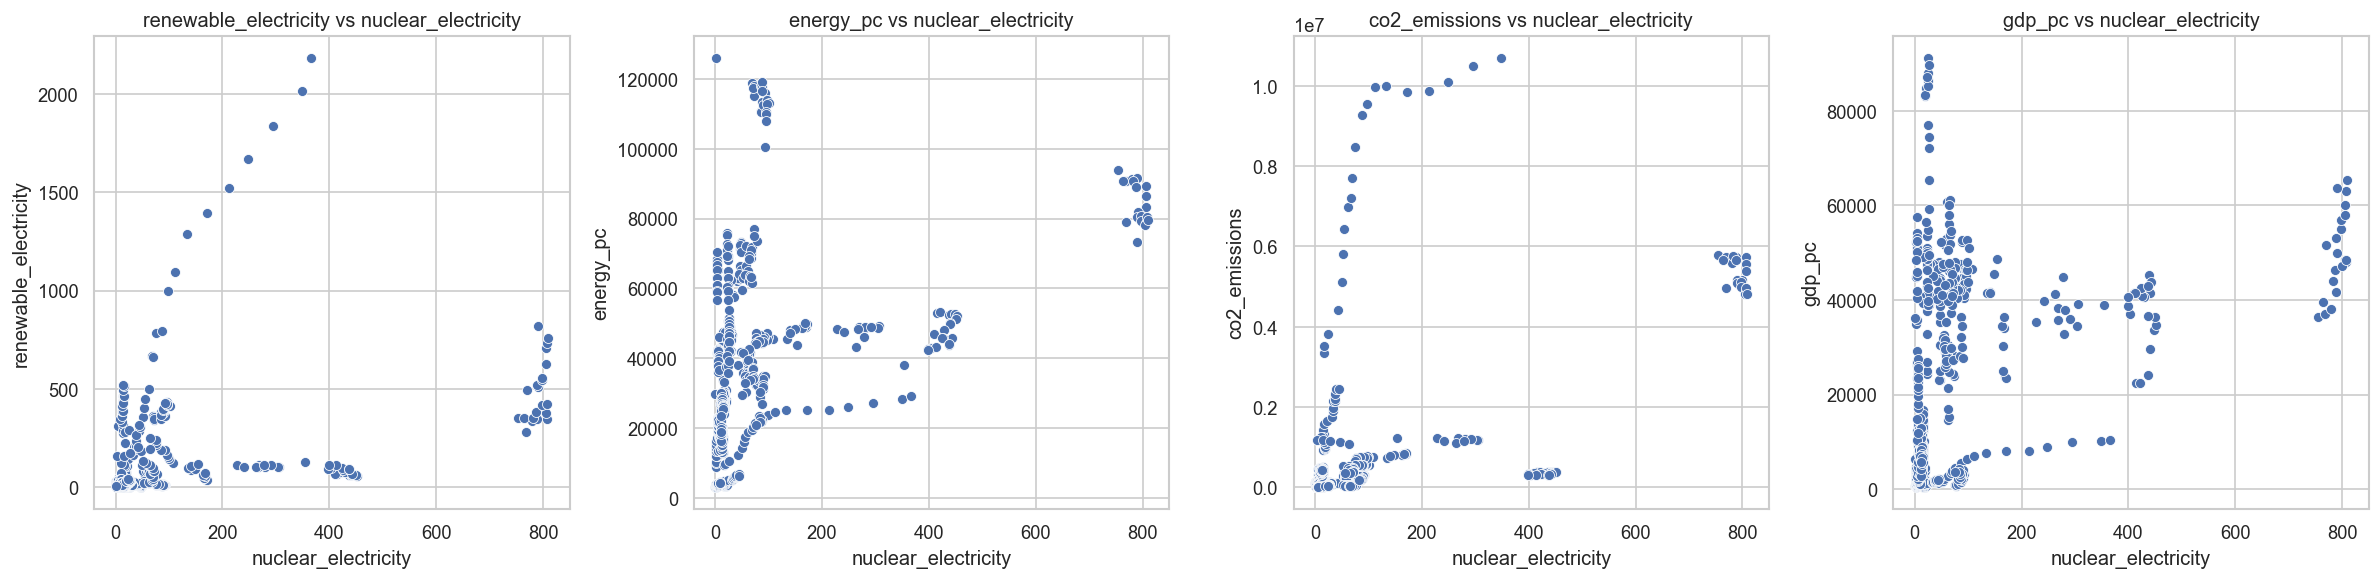

In [43]:
cols_to_plot = [
    ("nuclear_electricity", "renewable_electricity"),
    ("nuclear_electricity", "energy_pc"),
    ("nuclear_electricity", "co2_emissions"),
    ("nuclear_electricity", "gdp_pc")
]

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 5), dpi=120)

for ax, (x_col, y_col) in zip(axes, cols_to_plot):
    sns.scatterplot(data=df_nucl, x=x_col, y=y_col, ax=ax)
    ax.set_title(f"{y_col} vs {x_col}")

plt.tight_layout()
plt.show()

## 7 Conclusion

Nuclear energy remains a minor source of global electricity production.
The analysis shows that nuclear power remains a minority energy source globally, with only 30 out of 176 countries (≈17%) producing nuclear electricity between 2000 and 2020. The United States and France consistently lead as top producers, while Japan’s sharp decline after 2011 reflects the post-Fukushima shutdown, followed by gradual recovery. China’s steady growth indicates significant nuclear expansion, in contrast to Germany’s deliberate phase-out. Canada, Ukraine, the UK, Spain, and Sweden maintained stable production. Correlation analysis indicated relationships between nuclear electricity production and factors such as GDP per capita, CO₂ emissions, and the share of renewable energy sources. Visualizations in the form of scatterplots provided a comprehensive overview of global nuclear energy trends.

